In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1
Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [17]:
def get_lower_and_upper_bounds(series, multiplier=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier*iqr
    upper_bound = q3 + multiplier*iqr
    return lower_bound, upper_bound

## Exercise 2
Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [5]:
df = pd.read_csv('lemonade.csv')

In [7]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [38]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [8]:
#assigning series to be explored
temp = df.Temperature
rain = df.Rainfall
flyers = df.Flyers
price = df.Price
sales = df.Sales

In [25]:
lower_temp, upper_temp = get_lower_and_upper_bounds(temp)

temp[temp <= lower_temp]

364    15.1
Name: Temperature, dtype: float64

Depending on the location, this temperature could make sense. We will keep this outlier moving forward.

In [26]:
lower_rain, upper_rain = get_lower_and_upper_bounds(rain)

rain[rain <= lower_rain]

Series([], Name: Rainfall, dtype: float64)

There are no lower outliers for rainfall.

In [27]:
lower_flyers, upper_flyers = get_lower_and_upper_bounds(flyers)
flyers[flyers <= lower_flyers]

324   -38
Name: Flyers, dtype: int64

Unless somebody lost flyers that day, I do not think there can be negative flyers being put up. This outlier should be dropped.

In [28]:
lower_price, upper_price = get_lower_and_upper_bounds(price)
price[price <= lower_price]

0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
      ... 
360    0.5
361    0.5
362    0.5
363    0.5
364    0.5
Name: Price, Length: 365, dtype: float64

After further investigation, all of the prices are set as .5. Since they are all the same, we can ignore the relevance for price.

In [33]:
lower_sales, upper_sales = get_lower_and_upper_bounds(sales)
sales[sales <= lower_sales]

Series([], Name: Sales, dtype: int64)

There are no lower outliers for sales.

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [39]:
temp[temp >= upper_temp]

41    212.0
Name: Temperature, dtype: float64

They are probably not selling lemonade in the middle of a desert so this is most likely a mistake. We should drop this outlier.

In [40]:
rain[rain >= upper_rain]

0      2.00
1      1.33
2      1.33
5      1.54
6      1.54
10     1.54
11     1.33
12     1.33
15     1.67
16     1.43
19     1.43
23     1.54
27     1.33
28     1.33
337    1.54
338    1.82
342    1.43
343    1.82
345    1.33
346    1.43
347    1.54
350    1.33
351    1.43
354    1.33
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

I think we should keep all the rainfall that are in the upper outlier because there a normal person can't tell the difference between 1.5 inches of rain to 2 inches of rain. More than likely the sales were constant over a certain amount of rainfall.

In [43]:
flyers[flyers >= upper_flyers]

166    77
171    76
194    80
198    76
Name: Flyers, dtype: int64

These four are right on the upper edge of our outliers. It may be in our best interest to keep these since they are within 4 units of our upper bound. 

In [46]:
price[price >= upper_price]

0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
      ... 
360    0.5
361    0.5
362    0.5
363    0.5
364    0.5
Name: Price, Length: 365, dtype: float64

After further investigation, all of the prices are set as .5. Since they are all the same, we can ignore the relevance for price.

In [47]:
sales[sales >= upper_sales]

181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

In [49]:
df.iloc[180:185,:]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
180,6/30/17,Friday,89.4,0.53,47,0.5,38
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


The upper outliers are anywhere from 3-11 times greater than the upper bound. Index 183 and 184 might be an input mistake because of how high the sales are in comparison to the rest so we should probably drop these. Index 181 and 182 could possibly be explained as "normal" outliers since the temperatures are much higher and could influence an increase in sales.

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [50]:
lower_temp, upper_temp = get_lower_and_upper_bounds(temp, multiplier=3)

temp[temp <= lower_temp]

Series([], Name: Temperature, dtype: float64)

There are no lower outliers for tmeperature.

In [51]:
lower_rain, upper_rain = get_lower_and_upper_bounds(rain, multiplier=3)

rain[rain <= lower_rain]

Series([], Name: Rainfall, dtype: float64)

There are no lower outliers for rain.

In [52]:
lower_flyers, upper_flyers = get_lower_and_upper_bounds(flyers, multiplier=3)

flyers[flyers <= lower_flyers]

324   -38
Name: Flyers, dtype: int64

It is not possible to post a negative amount of flyers. This should definitely be dropped.

In [53]:
lower_price, upper_price = get_lower_and_upper_bounds(price, multiplier=3)

price[price <= lower_price]

0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
      ... 
360    0.5
361    0.5
362    0.5
363    0.5
364    0.5
Name: Price, Length: 365, dtype: float64

The prices are the same throughout. We can ignore the price category.

In [54]:
lower_sales, upper_sales = get_lower_and_upper_bounds(sales, multiplier=3)

sales[sales <= lower_sales]

Series([], Name: Sales, dtype: int64)

There are no lower outliers for sales.

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [58]:
temp[temp >= upper_temp]

41    212.0
Name: Temperature, dtype: float64

It is not normal to have a temperature of over 200 so we should drop this observation

In [56]:
rain[rain >= upper_rain]

0      2.00
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

In [57]:
upper_rain

1.69

A normal person would not be able to tell the difference between 1.69 inches of rain to 2.00 inches of rain. I think it would be best to keep these observations.

In [59]:
flyers[flyers >= upper_flyers]

Series([], Name: Flyers, dtype: int64)

There are no upper outliers for flyers.

In [60]:
price[price >= upper_price]

0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
      ... 
360    0.5
361    0.5
362    0.5
363    0.5
364    0.5
Name: Price, Length: 365, dtype: float64

The price is all the same so we will not drop any price observations.

In [61]:
sales[sales >= upper_sales]

181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

In [62]:
df.iloc[180:185,:]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
180,6/30/17,Friday,89.4,0.53,47,0.5,38
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


In [66]:
df[df.Temperature > 90.0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
154,6/4/17,Sunday,90.4,0.51,43,0.5,38
158,6/8/17,Thursday,90.7,0.50,46,0.5,39
162,6/12/17,Monday,93.0,0.50,67,0.5,40
166,6/16/17,Friday,99.3,0.47,77,0.5,41
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
185,7/5/17,Wednesday,93.0,0.40,55,0.5,40


After further investigation, we should probably drop all these observations because there are several observations with similar circumstances and results. These may have been input wrong or it was just one strange weekend.

## Exercise 3
Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

In [74]:
def plot_hist_num(df):
    '''
    Function to take in a DataFrame,
    select only numeric dtypes and
    display histograms for each numeric column
    '''
    num_df = df.select_dtypes(include=np.number)
    num_df.hist(ec='black')
    plt.tight_layout()
    plt.show()

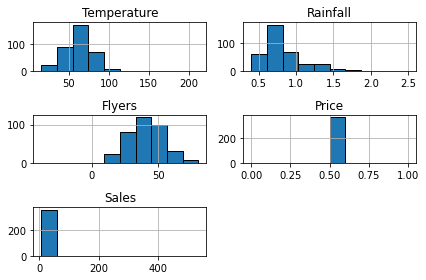

In [75]:
plot_hist_num(df)

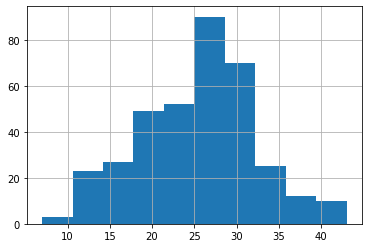

In [81]:
df.Sales[df.Sales <= 50].hist()
plt.show()

Temperature, Flyers and Sales seems to be normally distibuted. Price does not fluctuate while Rainfall is skewed to the right.

In [85]:
def lower_and_upper_sigma(series, sigma):
    mean = series.mean()
    std = series.std()
    lower_bound = mean - sigma * std
    upper_bound = mean + sigma * std
    return lower_bound, upper_bound

In [87]:
lower_temp, upper_temp = lower_and_upper_sigma(temp, 2)

In [93]:
df[df.Temperature < lower_temp]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [94]:
df[df.Temperature > upper_temp]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
166,6/16/17,Friday,99.3,0.47,77,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


The only outlier we should be rid of is the ones in the upper bound that has temperature listed as 212.

In [95]:
lower_flyers, upper_flyers = lower_and_upper_sigma(flyers, 2)

In [97]:
df[df.Flyers < lower_flyers]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [98]:
df[df.Flyers > upper_flyers]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
204,7/24/17,Monday,83.5,0.57,69,0.5,35
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


In [99]:
upper_flyers

67.67699877341579

We should only get rid of the lower outliers that have flyers listed as a negative.

In [100]:
lower_sales, upper_sales = lower_and_upper_sigma(sales, 2)

In [101]:
df[df.Sales < lower_sales]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [102]:
df[df.Sales > upper_sales]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


Theres sales are extremely abnormal and would probably be best to drop them.

## Exercise 4
Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [104]:
lower_temp, upper_temp = lower_and_upper_sigma(temp, 3)

In [105]:
df[df.Temperature < lower_temp]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [106]:
df[df.Temperature > upper_temp]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


This is probably a mistake and this outlier should be dropped.

In [107]:
lower_flyers, upper_flyers = lower_and_upper_sigma(flyers, 3)

In [108]:
df[df.Flyers < lower_flyers]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [109]:
df[df.Flyers > upper_flyers]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


We should drop this outlier because we cannot post negative flyers.

In [110]:
lower_sales, upper_sales = lower_and_upper_sigma(sales, 3)

In [111]:
df[df.Sales < lower_sales]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [112]:
df[df.Sales > upper_sales]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


These sales are abnormally large. Index 181 and 182 could just be a random huge weekend given the extremely high temperatures. They should all be collectively dropped due to how big they are compared to the rest of the data.